# Телеком — Определение неэффективных операторов

## Материалы:
- Дашборд: https://public.tableau.com/app/profile/.10864499/viz/Telecomoperator_16869100616920/Dashboard1?publish=yes
- Ссылка на презентацию: https://disk.yandex.ru/i/aWzm1Zeq8JqO1g

**ОПИСАНИЕ ПРОЕКТА**

Компания **"Нупозвони"** хочет проверить эффективность операторов и выявить самых неэффективных с целью дальнейшего внедрения в систему дополнительного функционала. 

Клиенты провайдера — колл-центры, которые:

- распределяют входящие вызовы на операторов
- совершают исходящие вызовы силами операторов

Также операторы могут делать внутренние вызовы — вызовы друг между другом внутри сети виртуальной телефонии. 

**Задача:**: Необходимо определить самых неэффективных операторов по следующим признакам низкой эффективности:
- много пропущенных входящих вызовов,
- долгое ожидания ответа при входящих внешних вызовах,
- мало исходящих вывозов — в случае тех колл-центров, что специализируются на обзвонах, а не обработке входящих звонков.
  
**В нашем распоряжении: датасеты, описывающие использование услуг «Нупозвони» — провайдера виртуальный телефонии**
- `telecom_clients.csv`
- `telecom_dataset.csv`


<span style="color:green">**Описание данных**</span> 

В нашем распоряжении два датасета: 
- **telecom_clients.csv** хранит информацию о тарифных планах клиентов
- **telecom_dataset.csv**  хранит информацию о совершенных звонках клиентов


**Структура telecom_dataset.csv:**
- **user_id** — Идентификатор клиентского аккаунта в сервисе
- **date** — Дата статистики
- **direction** — Направление вызовов (out - исходящий вызов, in — входящий вызов)
- **internal** — Является ли звонок внутренним звонком между операторами клиента
- **operator_id** — Идентификатор оператора
- **is_missed_call** — Является ли звонок пропущенным
- **calls_count** — Количество звонков
- **call_duration** — Длительность звонка (без учета времени ожидания)
- **total_call_duration** — Длительность звонка (с учетом времени ожидания)

**Структура telecom_clients.csv:**
- **user_id** — Идентификатор клиентского аккаунта в сервисе
- **tariff_plan** — Текущий тарифный план клиента
- **date_start** — Дата регистрации клиентв в сервисе

<span style="color:green">**План проекта:**</span> 

1. **Шаг 1.** Ознакомление с общей информацией

2. **Шаг 2.** Предобработка данных
- 2.1 Оценить количество и природу пропусков
- 2.2 Посмотреть на соответсвие типа данных
- 2.3 Посмотреть дубликаты

3. **Шаг 3.** Исследовательский анализ данных
- 3.1 Определим общее количество клиентов и период анализа: минимальную и максимальную даты наблюдения
- 3.2 Показатели эффективности работы контактного центра могут быть количественными и качественными. Количественные могут рассчитываться как для центра в целом, так и для отдельных операторов. А вот качественными, в основном, оценивается эффективность работы оператора
  - 3.2.1 количественные показатели(количество звонков и их длительность, как с учетом так и без учета времени ожидания)
  - 3.2.2 качественные показатели(направление звонка, внутренний или внешний, пропущенный вызов)
   
- 3.3 Проведем категоризацию операторов: на операторов исходящих и входящих вызовов
- 3.4 Для каждой категории операторов определим их эффективность по 3 признакам:
  - 3.4.1 много пропущенных входящих вызовов. Построим гистограмму разброса и установим границы эффективности
  - 3.4.2 долгое ожидания ответа при входящих внешних вызовах. Построим гисторграмму разброса и установим границы эффективности
  - 3.4.3 мало исходящих вывозов. Для Колл-центров, которые специализируются на исходящих вызовах построим гистограмму разброса и установим рамки эффективности.
- Определим границы эфективности:
  - Для операторов **исходящих** звоноков:
     - средняя продолжительность разговора не менее 25 секунд
     - количество звонков не менее 20 на оператора в день
  - Для операторов **входящих** звоноков:
     - время ожидания ответа внешних звонков не более 20 секунд
     - время ожидания ответа при внутренних звонках не более 20 секунд
     - Доля пропущенных вызовов(внешних) до 5%
     - Доля пропущенных(внутренние) до 5%
- 3.5 Определить операторов, у которых больше всего доля пропущенных звонков и превышена норма ожидания вызова неэффективными.
- 3.6 Выводы об эффективности операторов в соответствии с категоризацией вызовов. 

4. **Шаг 4.** Статистический анализ, проверка гипотез.
- 4.1 Средняя доля пропущенных внутренних и внешних вызовов одинакова
- 4.2 Средняя длительность исходящих и входящих вызовов одинакова

5. **Шаг 5.** Общиий Вывод
- Определить общие проблемы неэффективности в соответствии с категорией  операторов
- Дать рекомендации к повышению эффективности на системной основе.
- Мотивационная составляющая, как инструмент повышения качества сервиса.

**Шаг 6.** Подготовка презентации и дашборда:
- Презентация (ссылка, формат pdf)
- дашборд (набор № 2)


<a id="1"></a>
### Ознакомление с общей информацией 

<span style="color:brown">**Загрузим данные и подготовим их к анализу**</span> 

In [1]:
# импортируем все необходимые для работы библиотеки
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

import plotly.express as px
from plotly import graph_objects as go
import plotly.express as px
import math as mth
import datetime

warnings.filterwarnings('ignore')

In [2]:
# работать с данными g по тарифным планам Клиентов мы не будем, поэтому закомментируем их
#clients= pd.read_csv('https://code.s3.yandex.net/datasets/telecom_clients.csv')

In [3]:
#telecom= pd.read_csv('telecom_dataset.csv')
dataset= pd.read_csv('https://code.s3.yandex.net/datasets/telecom_dataset.csv')

In [4]:
# будем работать с информацией о совершенных звонках клиентов из таблицы 'dataset'
# посмотрим на общую информацию и количество строк до того, как проведем предобработку
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


(53902, 9)

**Вывод**: 
- Датасет содержит 53902 записи о звонках операторов, 9 строк 
- Пропуски:
   - в столбцах с информацией о внутреннем или внешнем звонке
   - об идентификаторе оператора 
- Названия столбцов записаны в соответствии со стилем "snake case"
- Некоторые типы данных нужно изменить

In [5]:
# посмотрим как выглядит наша таблица
dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


<a id="2"></a>
### Предобработка данных

<a id="2.1"></a>
<span style="color:brown"> 2.1 Сначала посмотрим на **пропуски**</span>

In [6]:
# посмотрим на долю пропусков, решим что с ними делать
pd.DataFrame(round(dataset.isna().mean().sort_values(ascending=False)*100,2)).style.background_gradient('coolwarm')

,0
operator_id,15.160000
internal,0.220000
user_id,0.000000
date,0.000000
direction,0.000000
is_missed_call,0.000000
calls_count,0.000000
call_duration,0.000000
total_call_duration,0.000000


**Вывод:**
- по данным **operator_id - идентификатор оператора** 15,16% пропусков. Это приличное количество, просто так не удалить. "Заглушки" также ставить не будем, так как это, практически 1/7 часть данных, которая может пригодиться в исследовании
- а вот пропуски в столбце **internal - наличие внутренних звонков** можно удалить, их 0,22% всего.

In [7]:
# удалим строки с пропусками в internal
dataset= dataset.dropna(subset= ['internal']) 

Что делать со значениями **operator_id - идентификатор оператора**. Чтобы понять, нужно посмотреть, в каих случаях пропусков больше всего, то есть, имеется какая-либо зависимость или закономерность в пропусках. Для этого возьмем все данные по звонкам: исходящим/входящим('direction'), внутренним('internal'), пропущенным('is_missed_call')

In [8]:
# напишем цикл
for i in ['direction', 'internal', 'is_missed_call']:
    print(dataset[dataset['operator_id'].isna()][i].value_counts(), '\n')

in     7917
out     198
Name: direction, dtype: int64 

False    7760
True      355
Name: internal, dtype: int64 

True     7993
False     122
Name: is_missed_call, dtype: int64 



**Вывод:** Больше всего пропусков в случае внешних входящих вызовов. Это нормальная ситуация в Колл-Центрах, особенно, если КЦ перегружен. В остальных случаях, когда оператор не определен, ситуация нормальная. Поэтому принимаем решение, что пропуски заменим на целочисленное значение, с которым возможно работать дальше, замена на "0". 

In [9]:
# замена пропусков на 0
dataset['operator_id']= dataset['operator_id'].fillna(0)

<span style="color:brown">2.2 Посмотрим что с **дубликатами**</span>

In [10]:
# какое количество строк-дубликатов в наших данных
print('Количество строк-дубликатов:', dataset.duplicated().sum())

Количество строк-дубликатов: 4893


4893 от 53902 - это менее 10%, если мы их удалим, на результате исследования это не скажется, выборка достаточно хорошая для аналитики

In [11]:
# удалим дубликаты
dataset.drop_duplicates(inplace= True)

In [12]:
# посмотрим что унас получилось
dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,0.0,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [13]:
# снова перепроверим на дубликаты, чтобы убедиться в корректности данных
print('Количество строк-дубликатов:', dataset.duplicated().sum())

Количество строк-дубликатов: 0


<span style="color:brown">2.3 Поработаем с **типом данных**</span>

Вспомним какая информация в датасэте

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48892 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              48892 non-null  int64  
 1   date                 48892 non-null  object 
 2   direction            48892 non-null  object 
 3   internal             48892 non-null  object 
 4   operator_id          48892 non-null  float64
 5   is_missed_call       48892 non-null  bool   
 6   calls_count          48892 non-null  int64  
 7   call_duration        48892 non-null  int64  
 8   total_call_duration  48892 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.4+ MB


<span style="color:brown">Столбец **date** имеет тип **object**, приведем к типу **date** и оставим там только дату, время исключим</span>

In [15]:
# убираем время приводим к формату datetime
dataset['date']= pd.to_datetime(dataset['date']).dt.date
dataset['date']= pd.to_datetime(dataset['date'], format= '%Y-%m-%d')

<span style="color:brown">После того, как  поменяли значения в данных **operator_id** на "0" смело можно поменять тип данных на целочисленный, а значения в столбце **internal** заменим на булевый, подобно **is_missed_call**</span>

In [16]:
dataset= dataset.astype({'internal': 'bool',
                         'operator_id': 'int64'})

In [17]:
# посмотрим как выглядит тип данных после наших замен
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48892 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              48892 non-null  int64         
 1   date                 48892 non-null  datetime64[ns]
 2   direction            48892 non-null  object        
 3   internal             48892 non-null  bool          
 4   operator_id          48892 non-null  int64         
 5   is_missed_call       48892 non-null  bool          
 6   calls_count          48892 non-null  int64         
 7   call_duration        48892 non-null  int64         
 8   total_call_duration  48892 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(5), object(1)
memory usage: 3.1+ MB


**Вывод:**
- Удалили строки с пропусками в **internal** -0,22%
- Заменили 15,16% пропусков в **operator_id** 
- Удалили 9% строк-дубликатов
- Изменили тип данных в **date** и **'operator_id**

С такими данными можно приступать к следующему этапу - исследовательскому анализу.

###  Исследовательский анализ данных

<span style="color:brown">3.1 Определим общее количество клиентов и период анализа: минимальную и максимальную даты наблюдения, то есть за какой период данными мы располагаем</span>

In [18]:
# максимальная и минимальная даты
print('Период наблюдения: с {} по {}'.format(dataset['date'].min(), dataset['date'].max()))

Период наблюдения: с 2019-08-02 00:00:00 по 2019-11-28 00:00:00


**Итак**, период наблюдения со 2 августа по 28 ноября 2019, то есть, практически полных **4 месяца**.

<span style="color:brown">Теперь посмотрим на общее **количество клиентов** , а также определим среднее количество оператов у каждого из КЦ</span>

In [19]:
print('Количество клиентов у провайдера:', dataset['user_id'].nunique())

Количество клиентов у провайдера: 307


In [20]:
print('Количество операторов:', dataset['operator_id'].nunique())

Количество операторов: 1093


**Итак**, получается, что в среднем, у каждого клиента (КЦ) по **3 оператора**.
- **Информация к размышлению:**
  - Период наблюдения 4 месяца
  - Количество звонков в данных 48892
  - Количество операторов 1093
  - То есть, 48892/4/1093= 11,18 звонков месяц на операторов??? Норма в день должна быть в 2 раза больше).
- Уже на этом моменте можно было бы остановить исследование, так как выборка мала относительно периода исследования, и по полученным расчетам неэффективность видна сразу.
- **НО!** не всё так однозначно, будем исследовать те данные которые у нас есть, может, наша гипотеза неверна.

Так как все Колл-центры, как мы выяснили на этапе постановки задачи, предоставляют одну услугу(один бизнес), скорее всего, работают в одной и той же CRM, и это не сетевая программа, поэтому необходимо посмотреть на **уникальность id оператора**. То есть, идентификатор действительно принадлежит только одному оператору отдельного КЦ, или есть пересечения, то есть такой же номер у другого клиента (КЦ).

In [21]:
dataset.groupby('operator_id')['user_id'].nunique().sort_values()

operator_id
925104      1
937888      1
937898      1
937900      1
937902      1
         ... 
912296      1
912252      1
912010      1
913780      1
0         305
Name: user_id, Length: 1093, dtype: int64

**Итак**, всё в порядке, уникальный идентификатор уникален во всём датасете. Но есть нулевой(неопределенный) оператор у 305 из 307 клиентов. 

Теперь, для того, чтобы посчитать сколько операторов работает в каждом колл-центре, разделим операторов на 2 группы: 
- для этого сформируем отдельную таблицу, без неопределённых(нулевых) операторов, так как в противном случае они посчитаются как один оператор.

In [22]:
# таблица без нeулевых операторов
dataset_nzero = dataset.query('operator_id != 0')

In [23]:
# количество колл-центров с разным количеством сотрудников
dataset_nzero.groupby('user_id')['operator_id'].nunique().value_counts()

1     107
2      63
3      34
4      26
5      17
6      10
7       7
8       5
15      3
16      2
9       2
11      2
27      2
30      1
48      1
21      1
28      1
12      1
18      1
17      1
14      1
10      1
50      1
Name: operator_id, dtype: int64

**Итак:** 
- Есть 14 крупных клиентов, в штате которых от 11 до 50 операторов
- Есть также Колл-центры со штатом от 2-ух до 9-ти
- Почти треть клиентов(КЦ) с 1 оператором в штате 

Выделим нашу таблицу в отдельную переменную и добавим новые столбцы, нам может понадобиться эта анформация в дальнейшем исследовании.

In [24]:
# количество операторов у колл-центров
count_operators= dataset_nzero.groupby('user_id')['operator_id'].nunique()
count_operators= count_operators.reset_index()
count_operators.columns= ['user_id', 'n_operators']

<span style="color:brown">3.2 Показатели эффективности работы контактного центра могут быть количественными и качественными. Количественные могут рассчитываться как для центра в целом, так и для отдельных операторов. А вот качественными, в основном, оценивается эффективность работы оператора</span> 

3.2.1 количественные показатели(количество звонков и их длительность, как с учетом так и без учета времени ожидания). Выделим их в отдельную переменную и посмотрим на основные статистические данные

In [25]:
# количественные переменные 
quantit_variables= ['calls_count', 'call_duration', 'total_call_duration']

In [26]:
dataset[quantit_variables].describe()

,calls_count,call_duration,total_call_duration
count,48892.000000,48892.000000,48892.000000
mean,16.495214,868.088788,1158.976458
std,63.671633,3779.549967,4456.180933
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,46.000000
50%,4.000000,37.000000,210.000000
75%,12.000000,573.000000,902.000000
max,4817.000000,144395.000000,166155.000000


**Итак:** Что сразу бросается в глаза:
- Очень большое различие между средними значениями и медианными(почти в 4 раза), и это понятно, так как распределение не является нормальным.
- 50% количества звонков - 4, 75% - это 12 звонков на оператора в день.
- есть аномальные значения количества и продолжительности звонков: 
  - 4817 вызовов в день значит, что оператор, в среднем, как минимум сделал 10 звонков в минуту, понятно, что это некорректное значение.
- и как следствие аномальная продолжительность разговоров, 166155 секунд - это почти 46 часов разговора, что тоже за гранью разумного.
- есть звонки, которые не состоялись, их продолжительность "0", но продолжительность с временем ожидания 46 секунд

Причин может быть несколько:
1. Это технический сбой при сборе данных
2. Либо, даже если звонок был принят при дозвоне, он был сброшен(так часто бывает при рекламных обзвонах), длительность разговора 3-5 секунд, но он защитан как полноценный, причем, посекундной тарификации нет, длительность 1 минута.


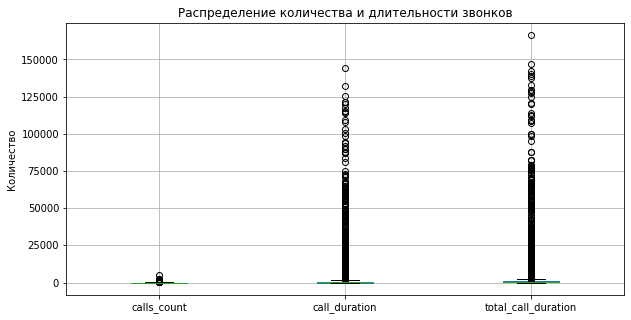

In [27]:
# визуализирум наши предположения, построим boxplot  и посмотрим на выбросы
plt.figure(figsize=(10, 5))
dataset[quantit_variables].boxplot()
plt.title('Распределение количества и длительности звонков')
plt.ylabel('Количество')
plt.show()

Для того, чтобы не потерять много данных, удалим записи, где значения в ячейке больше значения **97 перцентиля** соответствующего столбца, принебрежем 3-мя процентами%.

In [28]:
# удаление выбросов
for i in quantit_variables:
    dataset= dataset[dataset[i] <= dataset[i].quantile(.97)]

Добавим в наш датафрейм еще одну переменную, среднее время ожидания: **avg_waiting_time** и обнулим в нем значения у пропущенных вызовов, так как звонок не был принят, зазговор не состоялся. Применим функцию для данного условия

In [29]:
def dell_missed_calls(row):
    if row['is_missed_call'] == True:
        return 0
    else:
        return (row['total_call_duration'] - row['call_duration']) / row['calls_count']

In [30]:
# добавляем новый столбец ко всему дата
dataset['avg_waiting_time'] = dataset.apply(dell_missed_calls, axis=1)

In [31]:
# и также добавим его в список к нашим количественным переменным, теперь их 4
quantit_variables.append('avg_waiting_time')

Теперь посмотрим на результат после удаления аномалий и добавления новых переменных, напишем цикл для построения 4-ёх гистограмм для каждой количественной переменной

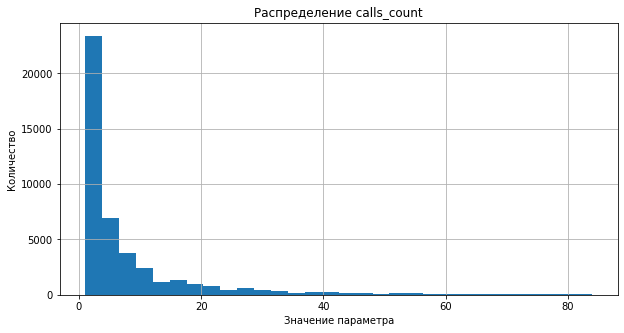

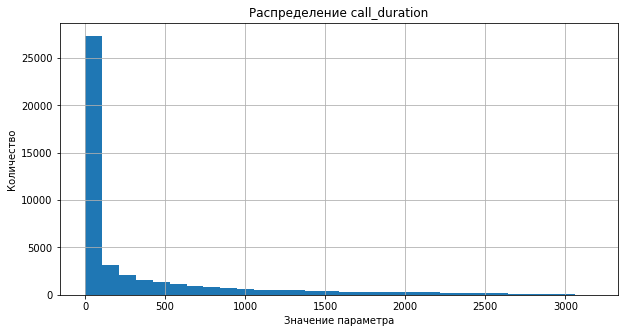

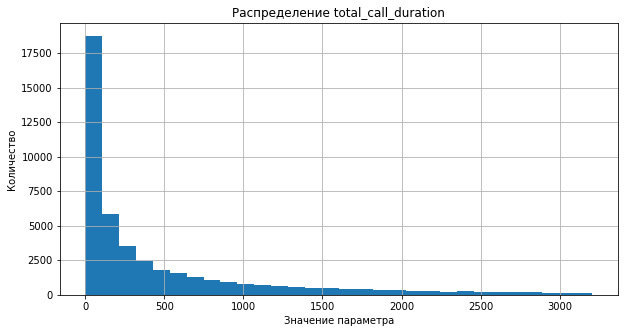

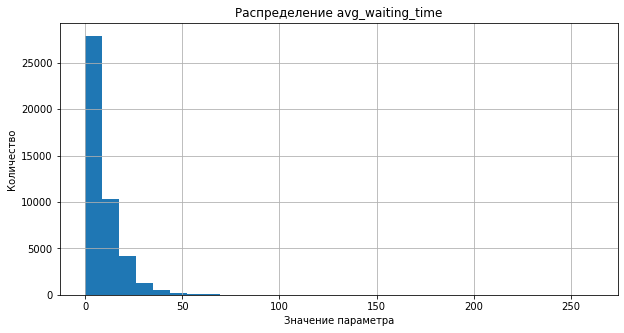

In [32]:
# построение гистограмм
for i in quantit_variables:
    plt.figure(figsize=(10, 5))
    dataset[i].hist(bins= 30)
    plt.title(f'Распределение {i}')
    plt.xlabel('Значение параметра')
    plt.ylabel('Количество')
    plt.show()

**Вывод:** 
- По очищенным данным видно, что для всех параметров характерны наличие небольших значений: до 2-5 звонков за день, длительность звонка до 250 секунд.
- Среднее время ожидания имеет тоже адекватную величину, до 20 секунд.

Количественные данные готовы к анализу

<span style="color:brown">3.2.2 Качественные показатели(направление звонка, внутренний или внешний, пропущенный вызов)</span>

Посмотрим сколько в данных входящих/исходящих, внутренних, пропущенных/принятых вызовов, также выделим их в отдельный список по аналогии с количественными переменными

In [33]:
qualit_variables= ['direction', 'internal', 'is_missed_call']

In [35]:
# Напимшем цикл, который перебирет нам все данные из списка по каждому типу вызовов
for i in qualit_variables:
    print('Столбец ' + i + ':')
    print(dataset[i].value_counts(), '\n')

Столбец direction:
out    25599
in     19030
Name: direction, dtype: int64 

Столбец internal:
False    38979
True      5650
Name: internal, dtype: int64 

Столбец is_missed_call:
False    23932
True     20697
Name: is_missed_call, dtype: int64 



**Итак:** какая видна закономерность?
- В направлении: больше исходящих вызовов, чем входящих
- Внутренних звонков немного, в 6 раз меньше внешних
- Пропущенных почти поровну: исходящих и входящих(внешние и внутренние)

Стоит заметить, что начальная таблица агрегирована, и каждая строка соответствует не одному вызову, а количеству вызовов определённого типа. Поэтому рассмотрим для каждого вида вызова не только количество записей, но и количество таких звонков (то есть сумму количества звонков в записях)

Нам нужно посмотреть на распределение звонков всех видов(исходящий/входящий, внутренний) и типов(пропущенный/принятый), лучше вего визуализировать, поэтому сначала мы **создадим таблицу, по которой впоследствии построим диаграмму распределения**

In [36]:
# сводная таблица звонков всех видов и типов
total_calls_count= (
    dataset.groupby(qualit_variables)
    .agg({'operator_id':'count',
         'calls_count': 'sum'})
    .sort_values(by='calls_count', ascending= False)
    .reset_index()
)

In [37]:
# создадим функцию, которая по условию расставит соответствующие типы для каждого вида звонка
def get_name(row):
    name = ''
    
    if row['direction'] == 'out':
        name = name + 'исходящий'
    else:
        name += 'входящий'
        
    if row['internal'] == True:
        name += ' внутренний'
    else:
        name += ' внешний'
        
    if row['is_missed_call'] == True:
        name += ' пропущенный'
    else:
        name += ' принятый'
        
    return name

In [38]:
#  создадим дополнительный столбец с типом звонка
total_calls_count['type'] = total_calls_count.apply(get_name, axis=1)
total_calls_count

,direction,internal,is_missed_call,operator_id,calls_count,type
0,out,False,True,10594,139219,исходящий внешний пропущенный
1,out,False,False,10026,96826,исходящий внешний принятый
2,in,False,False,10978,57886,входящий внешний принятый
3,in,False,True,7381,46112,входящий внешний пропущенный
4,out,True,False,2557,7942,исходящий внутренний принятый
5,out,True,True,2422,5071,исходящий внутренний пропущенный
6,in,True,True,300,944,входящий внутренний пропущенный
7,in,True,False,371,677,входящий внутренний принятый


Теперь визулизируем. Построим столбчатую диаграмму количественных значений

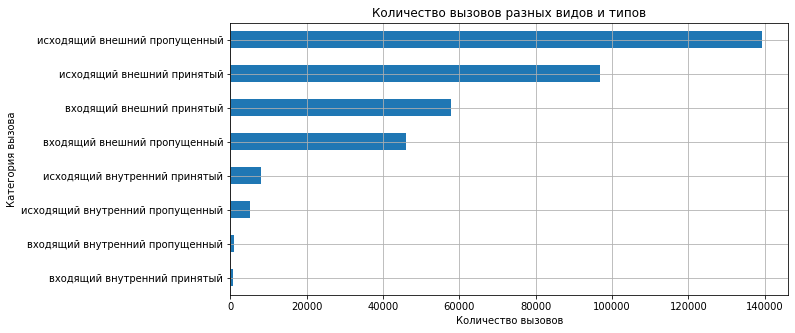

In [39]:
total_calls_count.sort_values(by='calls_count', ascending=True).plot(x='type', y='calls_count', kind='barh', title='Количество вызовов разных видов и типов', legend=False, figsize=(10,5), grid=True)
plt.xlabel('Количество вызовов')
plt.ylabel('Категория вызова')
plt.show()

**Итак,** сразу выделились лидеры и аутсайдеры. Но для анализа лучше всего апелировать долями. Пострим круговую диаграмму распределения данных

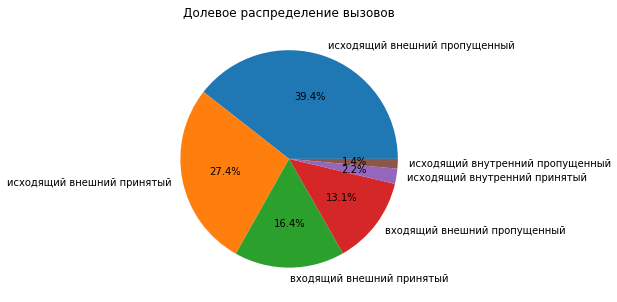

In [40]:
plt.figure(figsize= (10, 5))
plt.pie(total_calls_count.loc[:5]['calls_count'], 
        labels= total_calls_count.loc[:5]['type'], 
        autopct= '%1.1f%%')
plt.title('Долевое распределение вызовов')
plt.show()

**Вывод:**
- Самая большая доля вызовов - **исходящие внешние звонки, около 67%**, **39,4%** - это пропущенные. Сейчас у многих мобильных операторов популярна услуга "Защита от спама", поэтому такое количество непринятых не удивительно. 
- **Входящих внешних принятых больше**(17,8%), чем пропущенных(15,7%), но ненамного. Это говорит о том, что либо операторы помимо своих должностных обязанностей занимаются посторонними делами, либо КЦ перегружен из-за нехватки штата, как минимум в 2 раза.
- **Внутренних** звонков мало, всего **3,6%**, но **принятых больше**, чем пропущенных, и это уже хорошо.


<span style="color:brown">3.3 Проведем категоризацию операторов: на операторов исходящих и входящих вызовов</span>

Из условия мы знаем, что у нас есть колл-центры, которые специализируются на обзвонах, то есть совершают больше исходящих вызовов. И есть КЦ, которые больше принимают звонки, и есть такие, у которых примерно равное количество вызовов и тех и других. Понятно, что и требования к эффективности будут различны. Поэтому разделим КЦ по категориям.

Кроме того, нам нужна какая-то средняя величина, с которой в дальнейшем мы будем проводить сравнения, определять критерии эффективности, поэтому добавим новый столбец: "среднее время ожидания вызова"- **'avg_call'** для каждой записи. 

In [41]:
# добавим столбец 
dataset['avg_call']= (dataset['total_call_duration']- dataset['call_duration'])/ dataset['calls_count'] 
dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,avg_waiting_time,avg_call
0,166377,2019-08-04,in,False,0,True,2,0,4,0.0,2.000000
1,166377,2019-08-05,out,True,880022,True,3,0,5,0.0,1.666667
2,166377,2019-08-05,out,True,880020,True,1,0,1,0.0,1.000000
3,166377,2019-08-05,out,True,880020,False,1,10,18,8.0,8.000000
4,166377,2019-08-05,out,False,880022,True,3,0,25,0.0,8.333333


Теперь проведем **категоризацию КЦ**, уточним, это не операторы, поэтому здесь будем использовать **'user_id'** - Идентификатор клиентского аккаунта в сервисе "Нупозвони".

Задача исследования определить неэффективных операторов на основании определенных метрик, но оператор работает не сам по себе, а в КЦ, котрые специализируются на разных типах обработки звонков. Поэтому, проведя категоризацию КЦ, мы поймем для каких операторов какие метрики в расчете эффективности являются наиболее важными. И, к тому же, посмотрим на эффективность всего Колл-Центра, потому как рекомендации мы будем давать не опеарторам, а руководителям этих центров.

In [42]:
dataset_dir = dataset.query('call_duration != 0').pivot_table(index = ['user_id'], columns =['direction'], values = ['calls_count'], aggfunc = (sum)).fillna(0).reset_index()
dataset_dir.columns = ['user_id', 'in', 'out']
dataset_dir.head(10)

,user_id,in,out
0,166377,102.0,2897.0
1,166391,6.0,0.0
2,166392,102.0,0.0
3,166399,13.0,0.0
4,166405,1063.0,1689.0
5,166406,161.0,1113.0
6,166407,82.0,538.0
7,166428,123.0,0.0
8,166481,1.0,0.0
9,166482,47.0,0.0


**Итак,** есть таблица, в которой собраны все КЦ с количеством исходящих и входящих вызовов

In [43]:
# теперь напишем функцию для Ящика с усами и посмотрим на данные для входящих и исходящих вызовов
def mybox(dataset,title):
    q75, q25= np.percentile(dataset, [75,25])
    iqr= q75 - q25
    min= q25 - (q25+ 1.5*iqr)
    max= q75 + 1.5*iqr
    print('Граница нижнего уса:', min)
    print('Граница верхнего уса:', max)
    print(dataset.describe())
    fig= plt.figure(figsize= (10, 5)) 
    plt.ylim(0, max*1.2)
    plt.boxplot(dataset, sym='k+', notch =1)
    plt.title(f'График "ящик с усами"для {title}')
    plt.show()

Граница нижнего уса: -225.0
Граница верхнего уса: 383.0
count     287.000000
mean      205.439024
std       486.908431
min         0.000000
25%         8.000000
50%        38.000000
75%       158.000000
max      5097.000000
Name: in, dtype: float64


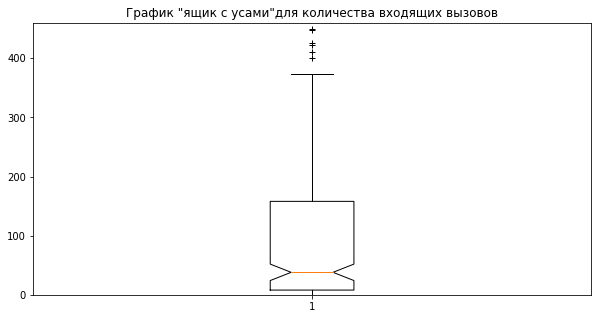

In [44]:
mybox(dataset_dir['in'], 'количества входящих вызовов')

Граница нижнего уса: -540.0
Граница верхнего уса: 900.0
count     287.000000
mean      365.257840
std       783.731537
min         0.000000
25%         0.000000
50%        44.000000
75%       360.000000
max      6683.000000
Name: out, dtype: float64


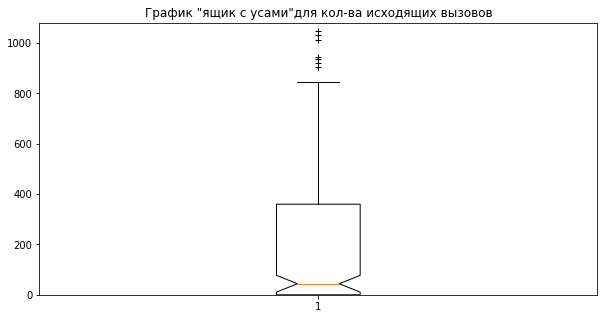

In [45]:
mybox(dataset_dir['out'], 'кол-ва исходящих вызовов')

**Итак:** 
- среднее значение входящих вызовов 205, исходящих 365
- 75% Колл-цетров(то есть большинство) совершают 360 исходящих и принимают 158 входящих звонков. Что, практически, совпадает со средними значениями.

Но много это или мало, непонятно, надо посмотреть на долевое распределение

In [46]:
# посчитаем долю от общих звонков и добавим к нашей таблице
dataset_dir['percentile'] = dataset_dir['in']/(dataset_dir['in']+ dataset_dir['out'])*100
dataset_dir

,user_id,in,out,percentile
0,166377,102.0,2897.0,3.401134
1,166391,6.0,0.0,100.000000
2,166392,102.0,0.0,100.000000
3,166399,13.0,0.0,100.000000
4,166405,1063.0,1689.0,38.626453
...,...,...,...,...
282,168583,22.0,0.0,100.000000
283,168598,21.0,0.0,100.000000
284,168601,79.0,223.0,26.158940
285,168603,0.0,10.0,0.000000


Теперь нам нужно прописать условие для того, чтобы определить специфику КЦ, на чем он работает, на исходящих или входящих звонках. Присвоим **in** или **out** идентификатору клиентского аккаунта **user_id** через функцию. Условие такое, если строка содержит направление **'in'** и процент в ней больше или рвно 49,99, то это категория "'in'", и тоже  условие с "'out'", только там порог 50,01. Понятно, что делить по 50% нельзя, так как программа запутается и не сможет нам корректно расставить данные.

In [47]:
def group_dir(row):
    if (row['in'] !=0) & (row['percentile'] >= 49.99):
        return 'in'
    elif (row['out'] != 0) & (row['percentile'] <= 50.01):
         return 'out'
    else:
        return 'проверить'

In [48]:
dataset_dir['priority_group'] = dataset_dir.apply(group_dir, axis =1)
dataset_dir['priority_group'].value_counts()

in     150
out    137
Name: priority_group, dtype: int64

**Итак:** 
- КЦ, которые специализируются на обзвонах на исходящих **130**клиентов, 
- **137 КЦ** специализируются на входящих звонках

In [49]:
# присвоим in или out идентификатору клиентского аккаунта user_id 
dataset_dir_new = dataset_dir[['user_id', 'priority_group']]
dataset_dir_new

,user_id,priority_group
0,166377,out
1,166391,in
2,166392,in
3,166399,in
4,166405,out
...,...,...
282,168583,in
283,168598,in
284,168601,out
285,168603,out


Теперь осталось добавить эти данные к основной таблице, с которой мы будем работать далее

In [50]:
dataset= dataset.merge(dataset_dir_new, on = 'user_id')
dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,avg_waiting_time,avg_call,priority_group
0,166377,2019-08-04,in,False,0,True,2,0,4,0.0,2.000000,out
1,166377,2019-08-05,out,True,880022,True,3,0,5,0.0,1.666667,out
2,166377,2019-08-05,out,True,880020,True,1,0,1,0.0,1.000000,out
3,166377,2019-08-05,out,True,880020,False,1,10,18,8.0,8.000000,out
4,166377,2019-08-05,out,False,880022,True,3,0,25,0.0,8.333333,out


**Итак,** Произвели категоризацию Клиентов(КЦ), теперь приступим к самим метрикам, на основании которых будем определять эффективность.

<span style="color:brown">3.4. Определение эффективности по 3-ём признакам:</span>

Для каждой категории операторов определим их эффективность по 3 признакам:

- 3.4.1 долгое ожидания ответа при входящих внешних вызовах. Построим гисторграмму разброса и установим границы эффективности
- 3.4.2 много пропущенных входящих вызовов. Построим гистограмму разброса и установим границы эффективности
- 3.4.3 мало исходящих вывозов. Для Колл-центров, которые специализируются на исходящих вызовах построим гистограмму разброса и установим рамки эффективности.

Определим границы эфективности:

- Для операторов исходящих звоноков:
  - средняя продолжительность разговора не менее 25 секунд
  - количество звонков не менее 30 на оператора в день
- Для операторов входящих звоноков:
  - время ожидания ответа внешних звонков не более 20 секунд
  - время ожидания ответа при внутренних звонках не более 20 секунд
  - Доля пропущенных вызовов(внешних) до 5%
  - Доля пропущенных(внутренние) до 5%

<span style="color:brown">3.4.1 Оценим по среднему времени ожидания вызова **avg_call**, построим "Ящик с усами"</span>

Граница нижнего уса: -15.326450892857144
Граница верхнего уса: 33.32645089285714
count    24210.000000
mean        14.340639
std         10.562538
min          0.000000
25%          7.782366
50%         12.452273
75%         18.000000
max        261.000000
Name: avg_call, dtype: float64


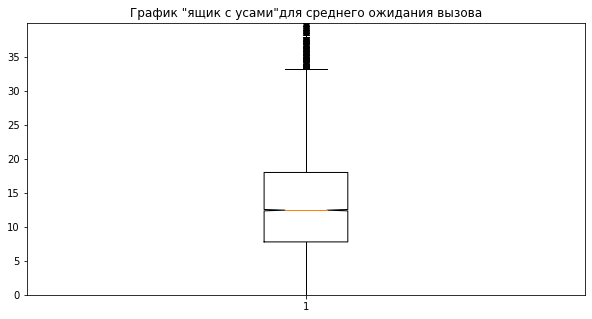

In [51]:
mybox(dataset.query('call_duration !=0').avg_call, 'среднего ожидания вызова')

**Итак:** Как мы определили "На старте" проекта время ожидания внутренних и внешних звонков не более 20 секунд - данный показатель в основной своей массе у нас подходит, среднее значение 14 секунд. Данная метрика подойдет для колл-центров из категории "in", принимающих звонки.

<span style="color:brown">3.4.2 Посмотрим на следующую метрику: количество(долю) пропущенных звонков как внешних так и внутренних из тех КЦ, которые работают на прием звонков</span>

Граница нижнего уса: -7.5
Граница верхнего уса: 13.5
count    5212.000000
mean        7.017652
std        12.409568
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max        84.000000
Name: calls_count, dtype: float64


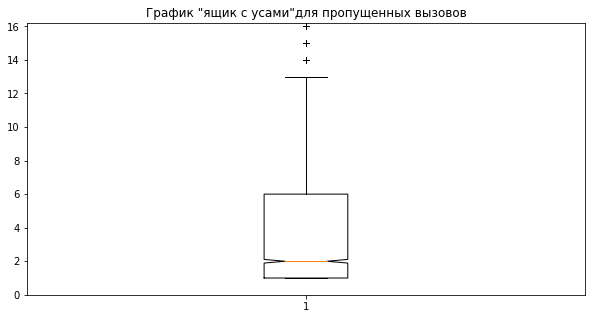

In [52]:
mybox(dataset.query('priority_group == "in" and is_missed_call == True')['calls_count'], 'пропущенных вызовов')

**Итак,** в среднем, количество пропущенных **6** вызовов, **75%** Колл-центров пропускают 7 вызовов

Сформируем сводную таблицу, где для каждого колл-центра посчитаем количество пропущенных входящих звонков. Визуализируем наши данные, построим гистограмму распределения

In [53]:
missed_calls_Nan= dataset[(dataset['priority_group']== 'in') & (dataset['is_missed_call'] == True)]

In [54]:
missed = missed_calls_Nan.groupby('user_id', as_index= False).agg({'calls_count':'sum'}).sort_values(by='calls_count', ascending=False)
missed.head(10)

,user_id,calls_count
131,168252,5640
8,166582,4128
42,167071,1948
73,167521,1943
98,167888,1669
68,167445,1525
124,168154,1382
82,167653,1356
92,167827,1342
38,167016,1074


In [55]:
# посмотрим на статистические значения
missed['calls_count'].describe()

count     148.000000
mean      247.135135
std       663.635121
min         1.000000
25%        14.000000
50%        42.000000
75%       133.250000
max      5640.000000
Name: calls_count, dtype: float64

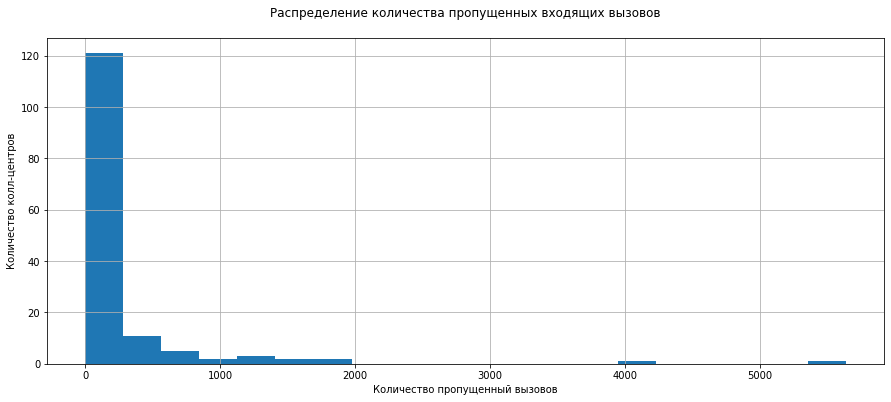

In [56]:
missed['calls_count'].hist(bins= 20, figsize=(15,6))
plt.title('Распределение количества пропущенных входящих вызовов\n')
plt.xlabel('Количество пропущенный вызовов')
plt.ylabel('Количество колл-центров')
plt.show()

**Итак,** на гистограмме видно, что большое количество КЦ имеют небольшое количество пропущенных вызовов. Также есть колл-центры, у которых за весь период может насчитываться более 6000 пропущенных звонков. Процент пропущенных не должен привышать **5%**, такой порог для колл-центров мы установили в самом начале.

In [57]:
# добавим этот параметр отдельным столбцом к нашей таблице, он нам пригодится как эталон при проверке эффективности 
dataset['miss_limit'] = round(dataset['calls_count'] * 0.05)

<span style="color:brown">3.4.3  Мало исходящих вывозов — в случае тех колл-центров, что специализируются на обзвонах, категория "out". На гисторграмме разброса увидим выбросы и установим рамки эффективности</span>

Граница нижнего уса: -12.0
Граница верхнего уса: 21.0
count    17381.000000
mean         7.207123
std          8.982800
min          1.000000
25%          1.000000
50%          4.000000
75%          9.000000
max         83.000000
Name: calls_count, dtype: float64


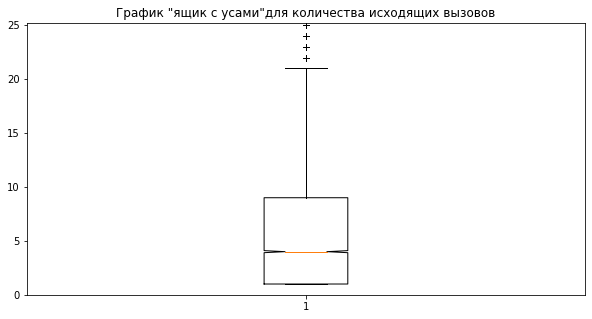

In [58]:
mybox(dataset.query('priority_group == "out" and is_missed_call == False')['calls_count'], 'количества исходящих вызовов')

**Итак,** среднее количество исходящих вызовов 5, основная масса КЦ, 75% совершает 7 звонков. Есть и максимальное 42, но скорее всего, это большие КЦ. Мы определили метрику эффективности, как 20 звонков в день на оператора.

Как будем проводить комплексную оценку эффективности: 
- Провели категоризацию КЦ
- Для каждой категории КЦ выделили основные показатели (не)эффективности. 

Теперь проведем оценку по принципу "скоринга" для каждой группы.
Определим условия низкой эффективности:
1. **Мало исходящих вывозов** — только для тех колл-центров, что специализируются на обзвонах.
- Здесь установим следующие ограничения:(учитываться будут только состоявшие звонки)
  - от 0 до 9 вызовов значение "1"
  - от 10-20 вызовов значение "0.5" 
  - более 20 вызовов значение "0". 
2. **Долгое ожидания ответа** при входящих внешних вызовах. Из условия, это 20 сек. 
- Здесь установим следующие ограничения:
  - от 0 до 10 сек значение "0"
  - от 11 до 20 сек значение "0.5"
  - более 20 сек значение "1"
3. **Много пропущенных** входящих вызовов. 
- Здесь установим следующие ограничения:
  - если кол-во пропущенных больше количества допустимого лимита **'miss_limit'**(мы его посчитали ранее)значение "1"
  - если кол-во пропущенных меньше **'miss_limit'** значение "0".
  
Затем мы соберем все эти метрики в оду переменную, и в случае, если суммарный скоринг больше "1", то - это неэффективный КЦ, оператор. Всё просто!

In [59]:
# оценка операторов, которые специализируются на исходящих обзвонах
def out_score(row):
    if row['direction']== "out" and row['is_missed_call']== False and 0<= row['calls_count'] <= 10:
        return 1
    elif row['direction']== "out" and row['is_missed_call']== False and 9< row['calls_count'] <= 20:
        return 0.5
    elif row['direction']== "out" and row['is_missed_call']== False and 21< row['calls_count']:
        return 0
    else:
        return 0

In [60]:
dataset['out_score']= dataset.apply(out_score, axis = 1)

In [61]:
# оценка операторов по продолжительности ожидания ответа
def avg_score(row):
    if row['direction']== "in" and 0<= row['avg_call'] <= 10:
        return 0
    elif row['direction']== "in" and 11<= row['avg_call'] <= 20:
        return 0.5
    elif row['direction']== "in" and 21<= row['avg_call']:
        return 1
    else:
        return 0

In [62]:
dataset['avg_score'] = dataset.apply(avg_score, axis = 1)

In [63]:
# оценка операторов по пропущенным вызовам 
def miss_score(row):
    if row['direction']== "in" and row['is_missed_call']== True and  row['calls_count']< row['miss_limit']:
        return 1
    else:
        return 0

In [64]:
dataset['miss_score']= dataset.apply(miss_score, axis = 1)

In [65]:
dataset['total_score']= dataset['miss_score']+ dataset['avg_score']+ dataset['out_score']

In [66]:
dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,avg_waiting_time,avg_call,priority_group,miss_limit,out_score,avg_score,miss_score,total_score
0,166377,2019-08-04,in,False,0,True,2,0,4,0.0,2.000000,out,0.0,0.0,0.0,0,0.0
1,166377,2019-08-05,out,True,880022,True,3,0,5,0.0,1.666667,out,0.0,0.0,0.0,0,0.0
2,166377,2019-08-05,out,True,880020,True,1,0,1,0.0,1.000000,out,0.0,0.0,0.0,0,0.0
3,166377,2019-08-05,out,True,880020,False,1,10,18,8.0,8.000000,out,0.0,1.0,0.0,0,1.0
4,166377,2019-08-05,out,False,880022,True,3,0,25,0.0,8.333333,out,0.0,0.0,0.0,0,0.0


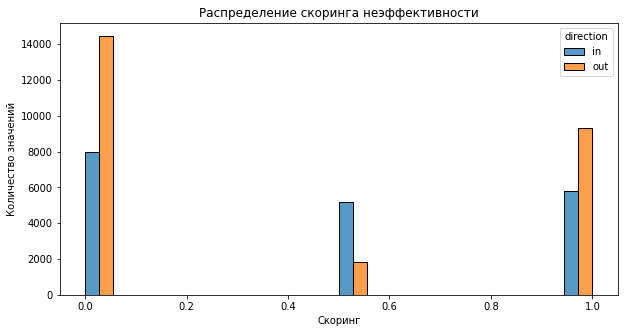

In [67]:
# визуализируем наш скоринг, посторим гистограмму распределения
plt.figure(figsize=(10, 5))
ax = sns.histplot(dataset, x='total_score', hue='direction', kde= False, multiple= 'dodge')
ax.axes.set_title("Распределение скоринга неэффективности")
ax.set_xlabel("Скоринг")
ax.set_ylabel("Количество значений")
plt.show()

**Итак,**
- Скоринг "0" - эффективный по всем признакам
- Скоринг "0.5" - по двум признакам неэффективен
- Скоринг "1" - неэффективен по всем признакам

<span style="color:brown">3.5 Определить операторов, у которых больше всего доля пропущенных звонков и превышена норма ожидания вызова неэффективными</span>

In [68]:
# определим неэффективных операторов
ineffective_operator= dataset.query('total_score >= 1').reset_index(drop=True)

In [69]:
#составим список неэффективных операторов и колл-центров
list_ineffective=  pd.pivot_table(ineffective_operator, values=['total_score'], index=['user_id', 'operator_id'])
list_ineffective.head(10)

total_score
user_id operator_id             
166377  0                    1.0
        880020               1.0
        880022               1.0
        880026               1.0
        880028               1.0
        881278               1.0
166391  0                    1.0
        882476               1.0
        882478               1.0
166392  0                    1.0

Теперь сгруппируем по идентификатору КЦ

In [70]:
list_group = list_ineffective.groupby('user_id').sum().sort_values(by = 'total_score', ascending= False)
list_group.columns = ['sum_count']
list_group.head(10)

,sum_count
user_id,
168187,40.0
167497,31.0
168062,28.0
168252,26.0
166658,18.0
167626,18.0
166680,17.0
166520,17.0
168091,16.0


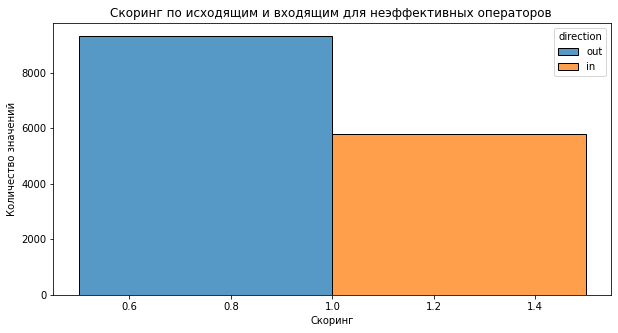

In [71]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(ineffective_operator, x='total_score', hue='direction', kde=False, multiple='dodge')
ax.axes.set_title("Скоринг по исходящим и входящим для неэффективных операторов ")
ax.set_xlabel("Скоринг")
ax.set_ylabel("Количество значений")
plt.show()

**Итак,** Как видно из графика ситуация в КЦ, специализирующихся на обзвонах ситуация хуже, чем у принимающих КЦ

**Подведем итоги анализа:**

In [72]:
print('Количество колл-центров в которых есть неэффективные операторы')
print('По всем признакам :', len(ineffective_operator['user_id'].unique()))
print('Всего колл-центров:', len(dataset['user_id'].unique()))
print('Доля неэффективных:', round((len(ineffective_operator['user_id'].unique())/len(dataset['user_id'].unique())*100), 2), '%')


Количество колл-центров в которых есть неэффективные операторы
По всем признакам : 267
Всего колл-центров: 287
Доля неэффективных: 93.03 %


In [73]:
print('Количество  неэффективные операторов:')
print('По всем признакам :', len(ineffective_operator['operator_id'].unique()))
print('Всего операторов:', len(dataset['operator_id'].unique()))
print('Доля неэффективных:', round((len(ineffective_operator['operator_id'].unique())/len(dataset['operator_id'].unique())*100), 2), '%')

Количество  неэффективные операторов:
По всем признакам : 882
Всего операторов: 1089
Доля неэффективных: 80.99 %


In [74]:
# операторы входящих вызовов
operator_in = ineffective_operator[(ineffective_operator['priority_group'] == 'in')]

In [75]:
print('Количество  неэффективных операторов специализирующихся на входящих звонках:')
print('По всем признакам :', len(operator_in['operator_id'].unique()))
print('Всего неэффективных операторов:', len(ineffective_operator['operator_id'].unique()))
print('Доля от неэффективных:', round((len(operator_in['operator_id'].unique()) / len(ineffective_operator['operator_id'].unique())*100), 2), '%')

Количество  неэффективных операторов специализирующихся на входящих звонках:
По всем признакам : 270
Всего неэффективных операторов: 882
Доля от неэффективных: 30.61 %


In [76]:
# операторы исходящих вызовов (на обзвоне)
operator_out = ineffective_operator[(ineffective_operator['priority_group'] == 'out')]

In [77]:
print('Количество  неэффективных операторов специализирующихся на исходящих звонках :')
print('По всем признакам :', len(operator_out['operator_id'].unique()))
print('Всего неэффективных операторов:', len(ineffective_operator['operator_id'].unique()))
print('Доля от неэффективных:', round((len(operator_out['operator_id'].unique()) / len(ineffective_operator['operator_id'].unique())*100), 2), '%')

Количество  неэффективных операторов специализирующихся на исходящих звонках :
По всем признакам : 613
Всего неэффективных операторов: 882
Доля от неэффективных: 69.5 %


**Вывод:**
- 93% колл-центров признаны неэффективными по всем показателям. 
- 82,35% - это доля неэффективных операторов в Этих КЦ
- Доля неэффективных операторов на входящих почти в 2 раза меньше, чем на исходящих.

Причин может быть несколько:
1. Неверно определен штат операторов, перегружены КЦ
2. Низкий уровень обучения: незнание продукта, неумение удержать клиента, отработать возражение
3. Неверная мотивация, низкая з/п: сотрудники не заинтересованы в выполнении своих КПЭ
4. Не продающие скрипты, особенно в КЦ на обзвоне
5. Неправильно сформированы графики работы операторов, КЦ

### Статистический анализ, проверка гипотез.

Мы проводили анализ эффективности КЦ по нескольким факторам, в том числе, по количеству пропущенных вызовов, определили, что они есть в каждом Колл-центре и их количество, в основной массе, до 30. Но вспомним, что у нас есть не только внешние, но и внутренние звонки(между операторами). Этот момент не анализировали. Поэтому, выдвинем гипотезу на этот счет и проверим её.

Кроме того, Проверим гипотезу, что среднее время ожидания ответа на входящий принятый внутренний звонок отличается от среднего времени ожидания ответа на принятый входящий внешний звонок, этот момент также не был подвержен анализу.

1. **Гипотеза №1** Проверим гипотезу, что входящие внешние звонки пропускаются так же часто, как и внутренние

- **Гипотеза H0:** Средняя доля входящих пропущенных внешних и внутренних вызовов одинакова.
- **Гипотеза H1:** Средняя доля входящих пропущенных внешних и внутренних вызовов различна.

In [78]:
# объявим критический уровень статистической значимости, если p-value окажется меньше него - отвергнем нулевую гипотезу
alpha = .05

# внутренние пропущенные вызовы
missed_internal= (dataset.query('direction == \'in\' and internal == True and is_missed_call == True')['calls_count'])

# внешние пропушщенные вызовы
missed_external= (dataset.query('direction == \'in\' and internal == False and is_missed_call == True')['calls_count'])

success = [missed_internal.count(), missed_external.count()]
print(success)

# соберем входящие внутренние и внешние
experience= [dataset.query('direction == \'in\' and internal == True')['calls_count'].count(), 
          dataset.query('direction == \'in\' and internal == False')['calls_count'].count()]
print(experience)

# пропорции успехов
p1 = success[0]/experience[0]
p2 = success[1]/experience[1]

# пропорция успехов в комбинированном датасете:
p_combined = (success[0] + success[1]) / (experience[0] + experience[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / experience[0] + 1 / experience[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)


p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение', "{0:.3f}".format(p_value))
    
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница\n')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными\n') 

[299, 7274]
[670, 18252]
p-значение 0.013
Отвергаем нулевую гипотезу: между долями есть значимая разница



In [79]:
print('Средняя доля пропущенных внутренних звонков:',  
      "{0:.2f}".format(missed_internal.sum()/ dataset.query('direction == \'in\' and internal == True')['calls_count'].sum()),
     '\nСредняя доля пропущенных внешних звонков:', 
      "{0:.2f}".format(missed_external.sum()/ dataset.query('direction == \'in\' and internal == False')['calls_count'].sum()))

Средняя доля пропущенных внутренних звонков: 0.58 
Средняя доля пропущенных внешних звонков: 0.44


**Вывод:** 
- p_value = 0,013, что меньше объявленного уровня статистической значимости alpha = .05. Поэтому мы отвергаем нулевую гипотезу. Если бы уровень значимости выбрали другой, например, alpha = .01, то разница долей не была бы статистически значимой и мы бы приняли первую гипотезу. Но глядя на цифры так не скажешь, разница почти в 25%.

2. **Гипотеза №2** 
- Проверим гипотезу, что среднее время ожидания ответа на входящий принятый внутренний звонок отличается от среднего времени ожидания ответа на принятый входящий внешний звонок

- **Гипотеза H0:** среднее время ожидания ответа на принятый входящий внутренний и среднее время ожидания ответа на принятый входящий внешний звонок одинаково
- **Гипотеза H1:** среднее время ожидания ответа на принятый входящий внутренний и среднее время ожидания ответа на принятый входящий внешний звонок различно

In [80]:
# проведём t-тест для сравнения средних двух выборок входящих и исходящих вызовов
results = st.ttest_ind(
    dataset.query('direction == "in" and is_missed_call == False and internal == True')['avg_call'], 
    dataset.query('direction == "in" and is_missed_call == False and internal == False')['avg_call'], equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue< alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.2745462415303225e-05
Отвергаем нулевую гипотезу


In [81]:
# среднее время ожидания ответа на принятый входящий внутренний
dataset.query('direction == "in" and is_missed_call == False and internal == True')['avg_call'].mean()

13.836854931531482

In [82]:
# среднее время ожидания ответа на принятый входящий вызов клиента
dataset.query('direction == "in" and is_missed_call == False and internal == False')['avg_call'].mean()

16.5451713625792

In [83]:
print('Среднее время ожидания ответа на принятый входящий вызов между операторами:', "{0:.2f}".format(dataset.query('direction == "in" and is_missed_call == False and internal == True')['avg_call'].mean()),
     '\nСреднее время ожидания ответа на принятый входящий вызов клиента:', "{0:.2f}".format(dataset.query('direction == "in" and is_missed_call == False and internal == False')['avg_call'].mean()))

Среднее время ожидания ответа на принятый входящий вызов между операторами: 13.84 
Среднее время ожидания ответа на принятый входящий вызов клиента: 16.55


**Вывод:** 
- По результатам проверки мы отвергаем нулевую гипотезу. Разница статистически значима, хотя абсолютные значения не имеют большого разрыва.

 ###  Общиий Вывод
 **Цель нашего исследования** состояла в проверке эффективности операторов с целью дальнейшего внедрения в систему дополнительного функционала. При условии:
- Клиенты провайдера — колл-центры, которые:
  - распределяют входящие вызовы на операторов
  - совершают исходящие вызовы силами операторов

**Стояла задача:** определить самых неэффективных операторов по следующим признакам низкой эффективности:
- много пропущенных входящих вызовов,
- долгое ожидания ответа при входящих внешних вызовах,
- мало исходящих вывозов — в случае тех колл-центров, что специализируются на обзвонах, а не обработке входящих звонков.

**Для этого мы проделали следующие действия:**
1. **Ознакомились** с имеющимися данными по звонкам за период с с 2 августа по 28 ноября 2019, то есть, практически полных 4 месяца..
2. **Обработали** данные:
- Удалили строки с пропусками в **internal** -0,2%
- Заменили 15,2% пропусков в **operator_id** 
- Удалили 9% строк-дубликатов
- Изменили тип данных в **date** и **'operator_id**
3. **Провели исследовательский анализ** данных по признакам неэффективности:
- Количество колл-центров, в которых есть неэффективные операторы
  - По всем признакам : 267
  - Всего колл-центров: 287
  - Доля неэффективных: 93.03 %
- Количество  неэффективные операторов:
  - По всем признакам : 882
  - Всего операторов: 1089
  - Доля неэффективных: 80.99 %
- Количество  неэффективных операторов специализирующихся на входящих звонках:
  - По всем признакам : 270
  - Всего неэффективных операторов: 882
  - Доля от неэффективных: 30.61 %
- Количество  неэффективных операторов специализирующихся на исходящих звонках :
  - По всем признакам : 613
  - Всего неэффективных операторов: 882
  - Доля от неэффективных: 69.5 %
- 93% колл-центров признаны неэффективными по всем показателям.
- 82,35% - это доля неэффективных операторов в Этих КЦ
- Доля неэффективных операторов входящих вызовов почти в 2 раза меньше, чем исходящих.

4. При **статистическом анализе** были проверены 2 гипотезы:
- Гипотеза №1 Входящие внешние звонки пропускаются так же часто, как и внутренние, которая была отвергнута. Внутренние звонки пропускаются чаще, чем внешние, их доля 58%
- Гипотеза №2 Среднее время ожидания ответа на входящий принятый внутренний звонок отличается от среднего времени ожидания ответа на принятый входящий внешний звонок, которая также была отвергнута. Внутренние звонки быстрее принимаются чем внешние, почти за 13 секунд.

5. Были выдвинуты предположения о такой низкой эффективности операторов, и как следствие Колл-центров.
   1. Неверно определен штат операторов, перегружены КЦ
   2. Низкий уровень обучения: незнание продукта, неумение удержать клиента, отработать возражение
   3. Неверная мотивация, низкая з/п: сотрудники не заинтересованы в выполнении своих КПЭ
   4. Не продающие скрипты, особенно в КЦ на обзвоне
   5. Неправильно сформированы графики работы операторов, КЦ

**Рекомендации для КЦ**
1. Нужно пересчитать нагрузку, и проверить достаточность штата, заполнить его при необходимости
2. Провести тестирование сотрудников на знание продукта, "точек касания" клиента.
3. Пересмотреть систему мотивации, выделить фокусно те направления, которые важны для бизнеса, и могут быть монетизированы для операторов.
4. Посмотреть на "Лучшие практики продаж", скорректировать скрипты
5. Пересмотреть графики операторов, не пересекаются ли в один день только неэффективные, или наоборот.

**Рекомендации для Сервиса "Нупозвони"**
- На системной основе мониторить эффективность КЦ, давать обратную связь, выстроить систему контроля, а также ввести систему мотивации/демотивации. Метод "кнута и пряника" работает во всех сферах жизни, и не только в бизнесе.

### Подготовка презентации и Дашборда

In [84]:
# выгрузим наш датасет
dataset.to_csv('data.csv', index = False)